In [1]:
!pip install yfinance pandas matplotlib seaborn

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------------------ --------------- 1.8/3.0 MB 11.2 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 11.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139097 sha256=7ebaadfef6fe7825886f81208e0e6572196b2a2e8dcb41a27737ec3f3140f4f6
  Stored in directory: c:\users\rahul\appdata\local\pip\cache\wheels\1a\57\6a\bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Fetching Apple stock data from Jan 1, 2020 to Apr 30, 2025
ticker = "AAPL"  # You can change this to any stock or FX pair (e.g., "EURUSD=X")
data = yf.download(ticker, start="2020-01-01", end="2025-04-30")

# Display the first few rows of the data
data.head()



[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000
2020-01-08,73.403625,73.706256,71.943736,71.943736,132079200


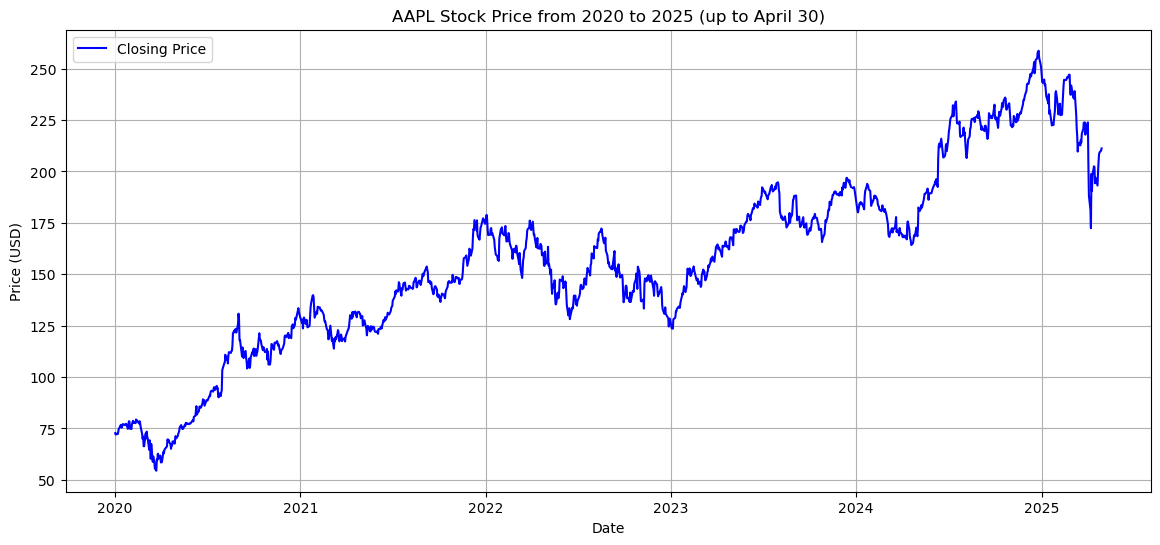

In [9]:
# Plotting the Closing Price
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.title(f'{ticker} Stock Price from 2020 to 2025 (up to April 30)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


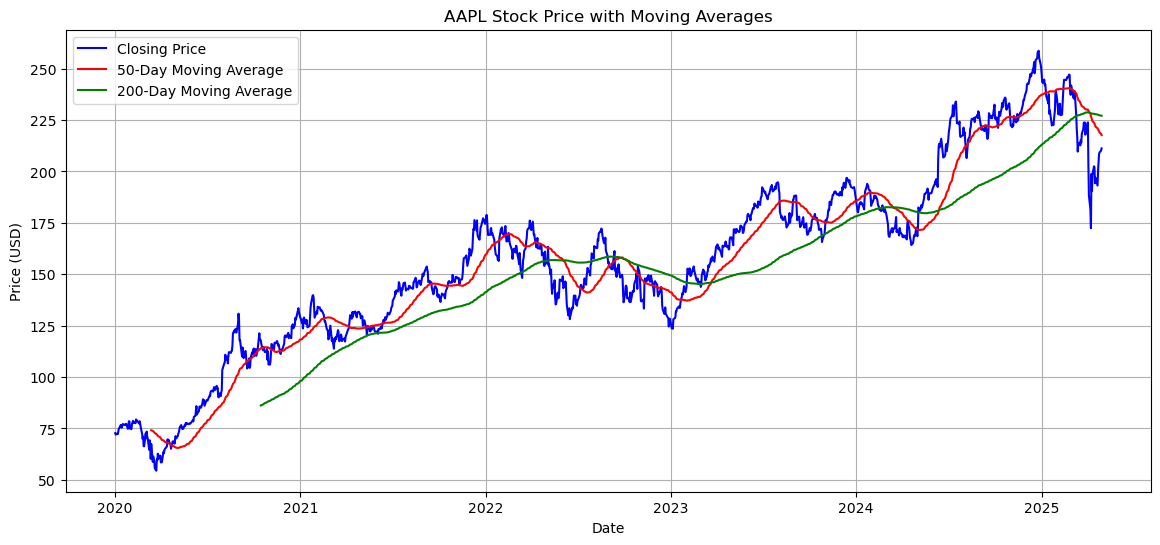

In [11]:
# Calculate moving averages
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

# Plotting the Closing Price along with Moving Averages
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['50_MA'], label='50-Day Moving Average', color='red')
plt.plot(data['200_MA'], label='200-Day Moving Average', color='green')
plt.title(f'{ticker} Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


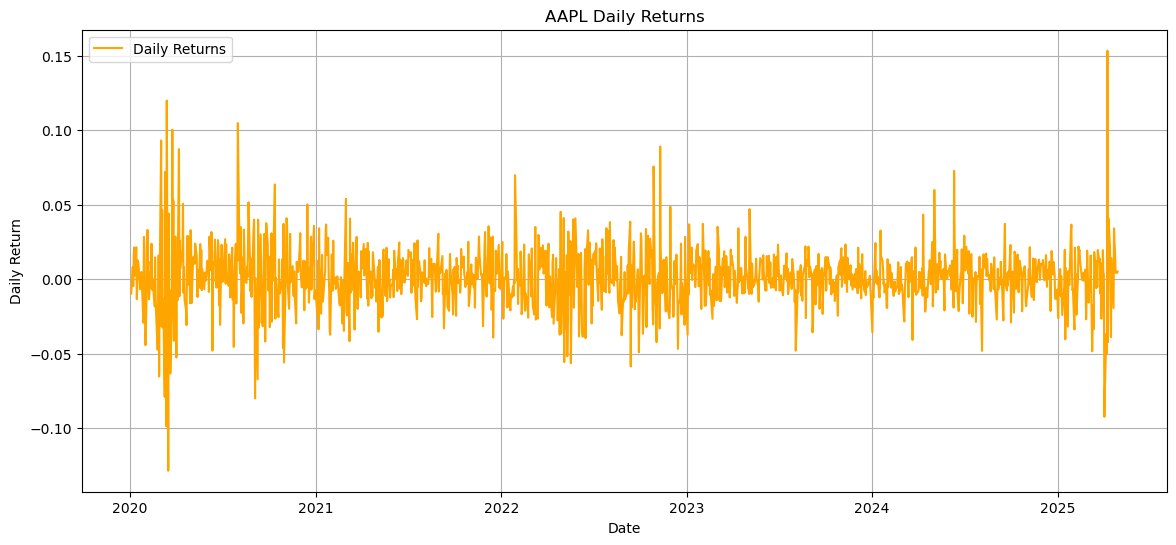

In [13]:
# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Plotting Daily Returns
plt.figure(figsize=(14, 6))
plt.plot(data['Daily Return'], label='Daily Returns', color='orange')
plt.title(f'{ticker} Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


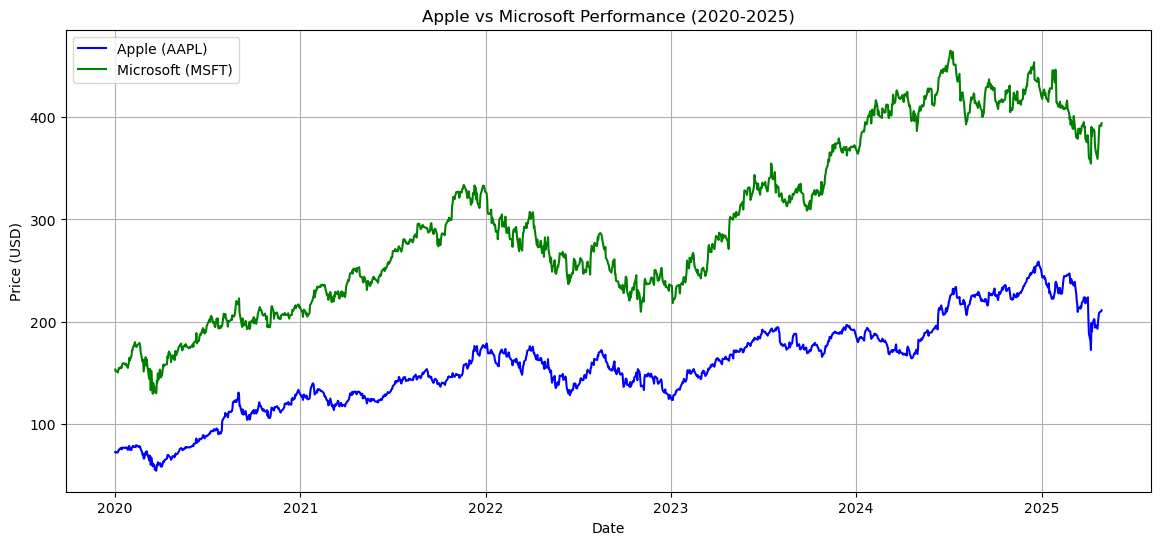

In [15]:
# Fetch data for multiple tickers
tickers = ['AAPL', 'MSFT']
data_aapl = yf.download('AAPL', start="2020-01-01", end="2025-04-30")['Close']
data_msft = yf.download('MSFT', start="2020-01-01", end="2025-04-30")['Close']

# Plot both stock performances
plt.figure(figsize=(14, 6))
plt.plot(data_aapl, label='Apple (AAPL)', color='blue')
plt.plot(data_msft, label='Microsoft (MSFT)', color='green')
plt.title('Apple vs Microsoft Performance (2020-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


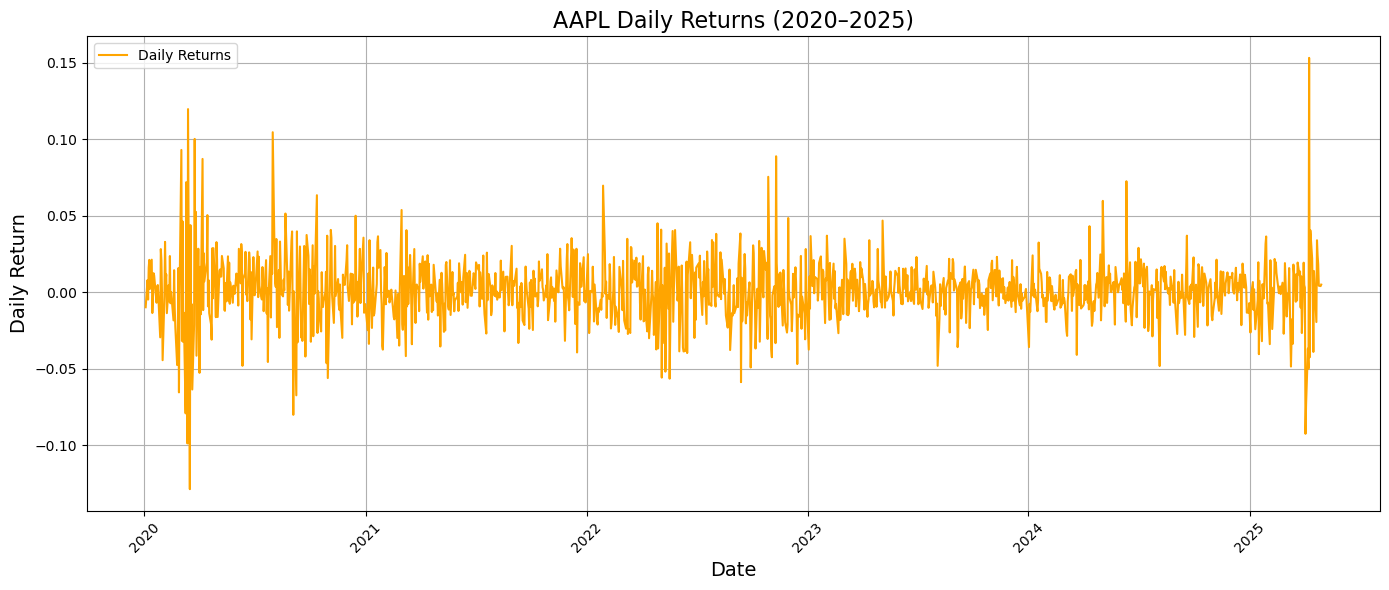

In [31]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download stock data
ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2025-04-30", group_by='ticker')

# Flatten columns (if needed)
if isinstance(data.columns, pd.MultiIndex):
    data.columns = [' '.join(col).strip() for col in data.columns.values]

# Check if 'AAPL Close' exists
close_col = f'{ticker} Close'

if close_col in data.columns:
    # Calculate daily returns
    data['Daily Return'] = data[close_col].pct_change()

    # Drop NaN values
    data = data.dropna(subset=['Daily Return'])

    # Plot daily returns
    plt.figure(figsize=(14, 6))
    plt.plot(data['Daily Return'], label='Daily Returns', color='orange')
    plt.title(f'{ticker} Daily Returns (2020–2025)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Daily Return', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"'{close_col}' column not found.")

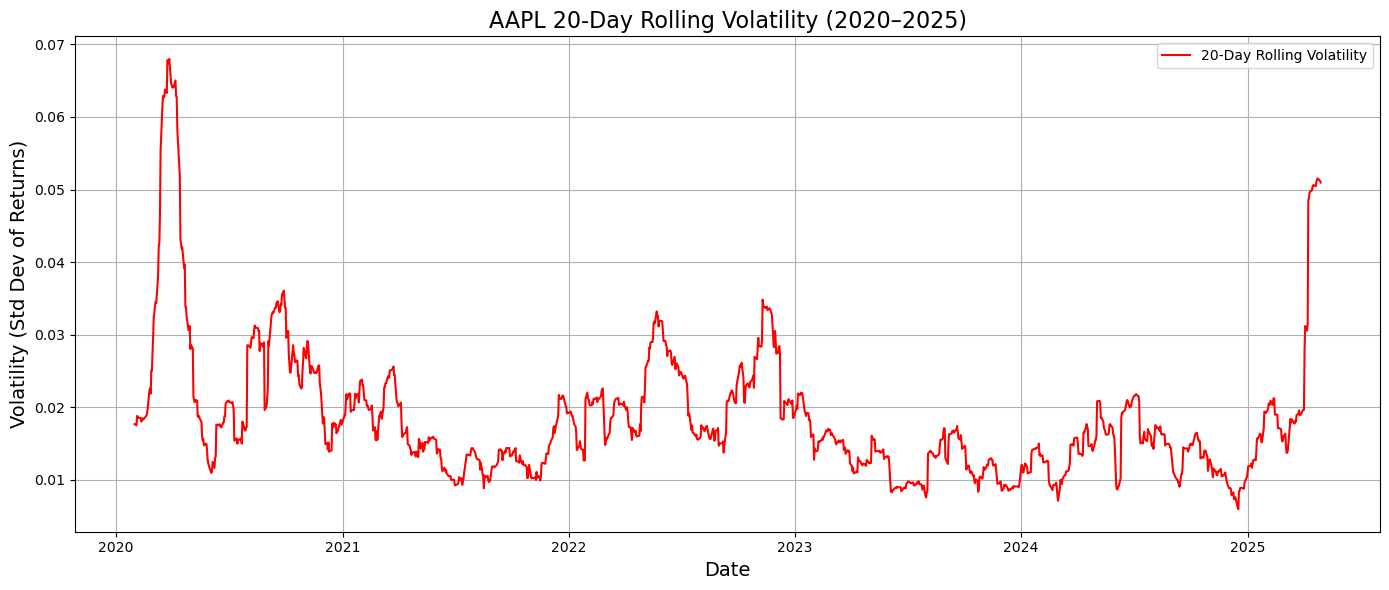

In [33]:
# Calculate rolling 20-day volatility
data['Rolling Volatility (20d)'] = data['Daily Return'].rolling(window=20).std()

# Plot it
plt.figure(figsize=(14, 6))
plt.plot(data['Rolling Volatility (20d)'], label='20-Day Rolling Volatility', color='red')
plt.title(f'{ticker} 20-Day Rolling Volatility (2020–2025)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volatility (Std Dev of Returns)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
import numpy as np

# Drop NaNs to ensure clean input
returns = data['Daily Return'].dropna()

# 1-day 95% Historical VaR
var_95 = np.percentile(returns, 5)  # 5th percentile
print(f"1-Day 95% Historical VaR: {var_95:.4%}")


1-Day 95% Historical VaR: -3.1791%


In [37]:
risk_free_rate = 0.01  # Approximate 1% annual risk-free rate
annual_trading_days = 252

# Calculate annualized return and volatility
avg_daily_return = returns.mean()
std_daily_return = returns.std()

sharpe_ratio = ((avg_daily_return - risk_free_rate/annual_trading_days) / std_daily_return) * np.sqrt(annual_trading_days)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 0.75


[*********************100%***********************]  5 of 5 completed


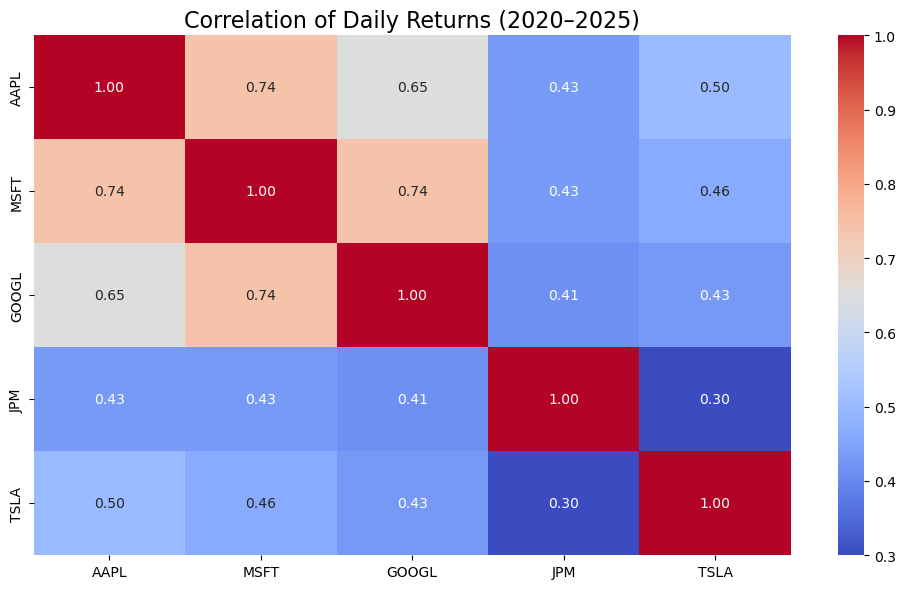

In [43]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'TSLA']

# Download with multi-level columns
data_all = yf.download(tickers, start='2020-01-01', end='2025-04-30', group_by='ticker', auto_adjust=True)

# Extract 'Close' prices for each ticker
close_prices = pd.DataFrame({ticker: data_all[ticker]['Close'] for ticker in tickers})

# Calculate daily returns
returns_all = close_prices.pct_change().dropna()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(returns_all.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Daily Returns (2020–2025)', fontsize=16)
plt.tight_layout()
plt.show()


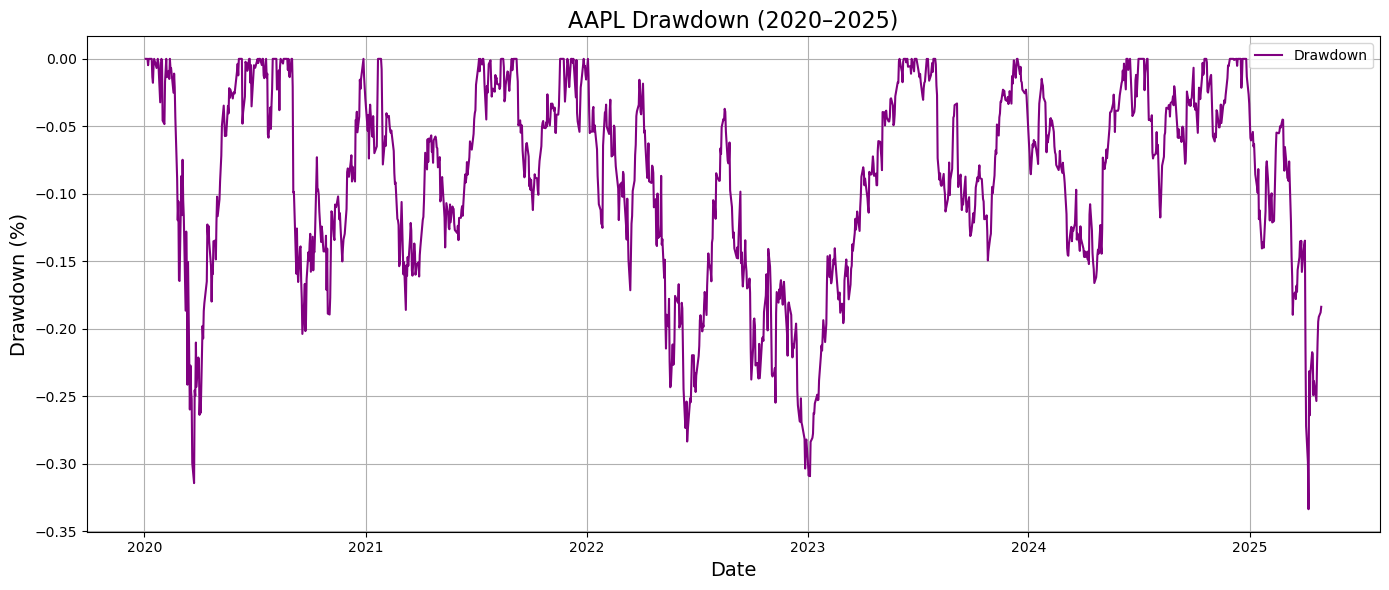

In [45]:
# Cumulative returns
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

# Rolling max
data['Rolling Max'] = data['Cumulative Return'].cummax()

# Drawdown
data['Drawdown'] = data['Cumulative Return'] / data['Rolling Max'] - 1

# Plot drawdown
plt.figure(figsize=(14, 6))
plt.plot(data['Drawdown'], label='Drawdown', color='purple')
plt.title(f'{ticker} Drawdown (2020–2025)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Drawdown (%)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\rahul\AppData\Local\Temp\ipykernel_8132\1085457858.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0_scalar = float(S0)  # Convert to scalar if necessary


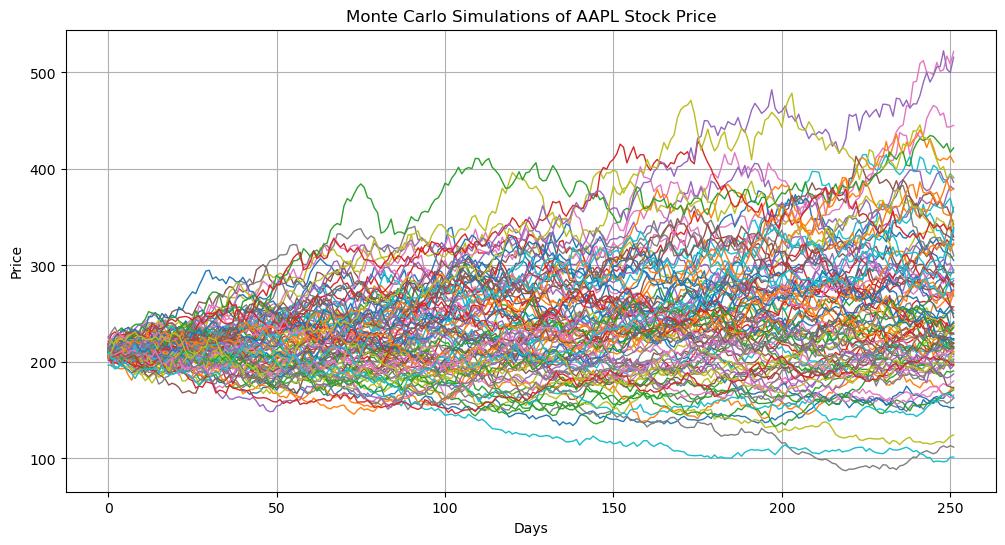

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Download data for a single ticker (e.g., AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2025-04-30')

# Check if the columns are MultiIndex, and extract 'Close' data
data = data['Close']

# Calculate returns
returns = data.pct_change().dropna()

# Parameters for simulation
S0 = data.iloc[-1]  # Last price (ensure this is treated as a scalar, not a pandas object)
mu = returns.mean()  # Mean return
sigma = returns.std()  # Volatility
days = 252  # 1 trading year
n_simulations = 100  # Number of simulations

# Initialize simulation matrix (days x simulations)
simulations = np.zeros((days, n_simulations))

# Run Monte Carlo simulations
for i in range(n_simulations):
    # Generate daily returns for the simulation
    daily_returns = np.random.normal(mu - 0.5 * sigma**2, sigma, days)  # GBM model for returns
    
    # Ensure S0 is treated as a scalar
    S0_scalar = float(S0)  # Convert to scalar if necessary
    
    # Calculate the price path using the cumulative sum of returns
    price_path = S0_scalar * np.exp(np.cumsum(daily_returns))  # Price path simulation
    
    # Store the simulated price path
    simulations[:, i] = price_path

# Plotting the simulations
plt.figure(figsize=(12, 6))
plt.plot(simulations, lw=1)
plt.title(f'Monte Carlo Simulations of {ticker} Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [73]:
# Convert S0 to a scalar using iloc[0] to avoid the deprecation warning
S0_scalar = float(S0.iloc[0])  # Convert to scalar using iloc[0]


In [75]:
import pandas as pd

# Assuming 'simulations' is a 2D array with each simulation in a column
simulations_df = pd.DataFrame(simulations)  # Convert to DataFrame
simulations_df.to_csv('simulation_results.csv', index=False)  # Save to CSV


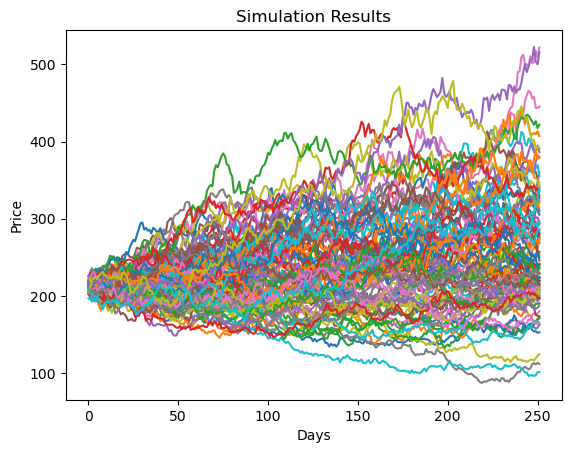

In [77]:
import matplotlib.pyplot as plt

plt.plot(simulations)  # Plot the simulations
plt.title('Simulation Results')
plt.xlabel('Days')
plt.ylabel('Price')
plt.savefig('simulations_plot.png')  # Save as PNG image


In [16]:
import yfinance as yf
import pandas as pd
import numpy as np

# Step 1: Download data
tickers = ['AAPL', '^GSPC']
data = yf.download(tickers, start='2020-01-01', end='2025-01-01')

# Step 2: Verify available columns (your output shows NO 'Adj Close')
print("Available columns:\n", data.columns)

# Step 3: Use REGULAR CLOSE prices (since Adj Close isn't available)
close_prices = data['Close']  # This matches your column structure
close_prices.columns = ['AAPL', 'SP500']  # Rename columns

# Step 4: Calculate returns
returns = close_prices.pct_change().dropna()

# Step 5: Calculate beta
cov_matrix = np.cov(returns['AAPL'], returns['SP500'])
beta = cov_matrix[0, 1] / cov_matrix[1, 1]

print(f"\nBeta of AAPL vs S&P 500: {beta:.4f}")

[*********************100%***********************]  2 of 2 completed

Available columns:
 MultiIndex([( 'Close',  'AAPL'),
            ( 'Close', '^GSPC'),
            (  'High',  'AAPL'),
            (  'High', '^GSPC'),
            (   'Low',  'AAPL'),
            (   'Low', '^GSPC'),
            (  'Open',  'AAPL'),
            (  'Open', '^GSPC'),
            ('Volume',  'AAPL'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])

Beta of AAPL vs S&P 500: 1.1733


In [18]:
pip show yfinance

Name: yfinance
Version: 0.2.57
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: C:\Users\rahul\anaconda3\Lib\site-packages
Requires: beautifulsoup4, frozendict, multitasking, numpy, pandas, peewee, platformdirs, pytz, requests
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install --upgrade yfinance

Note: you may need to restart the kernel to use updated packages.


In [22]:
import yfinance as yf
import pandas as pd

# Download data
tickers = ['AAPL', '^GSPC']
data = yf.download(tickers, start='2020-01-01', end='2025-01-01')

# Save to CSV (human-readable)
data.to_csv('stock_data.csv')  

# OR save to Parquet (smaller/faster)
data.to_parquet('stock_data.parquet')  

[*********************100%***********************]  2 of 2 completed


In [1]:
import yfinance as yf

tickers = ['AAPL', '^GSPC']
data = yf.download(tickers, start='2020-01-01', end='2025-01-01', auto_adjust=True)
print(data.columns)  # Check if 'Adj Close' now exists

[*********************100%***********************]  2 of 2 completed

MultiIndex([( 'Close',  'AAPL'),
            ( 'Close', '^GSPC'),
            (  'High',  'AAPL'),
            (  'High', '^GSPC'),
            (   'Low',  'AAPL'),
            (   'Low', '^GSPC'),
            (  'Open',  'AAPL'),
            (  'Open', '^GSPC'),
            ('Volume',  'AAPL'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])


In [5]:
# Rename columns (e.g., 'AAPL_Close', 'SP500_Close')
data.columns = ['_'.join(col) for col in data.columns]
print(data.columns)

Index(['Close_AAPL', 'Close_^GSPC', 'High_AAPL', 'High_^GSPC', 'Low_AAPL',
       'Low_^GSPC', 'Open_AAPL', 'Open_^GSPC', 'Volume_AAPL', 'Volume_^GSPC'],
      dtype='object')


In [9]:
# ==========================================================================
# 0. SETUP (RUN THIS FIRST)
# ==========================================================================
import yfinance as yf
import pandas as pd
import numpy as np

# Download data and prepare close_prices
tickers = ['AAPL', '^GSPC']
data = yf.download(tickers, start='2020-01-01', end='2025-01-01')

# Create close_prices DataFrame (THIS WAS MISSING)
close_prices = data['Close'].copy()
close_prices.columns = ['AAPL', 'SP500']  # Rename columns

# ==========================================================================
# 2. Rolling Sharpe & Volatility (NOW IT WILL WORK)
# ==========================================================================
def calculate_rolling_metrics(returns, window=30):
    rolling_sharpe = returns.rolling(window).mean() / returns.rolling(window).std()
    rolling_vol = returns.rolling(window).std() * np.sqrt(252)
    return rolling_sharpe, rolling_vol

aapl_returns = close_prices['AAPL'].pct_change().dropna()
rolling_sharpe, rolling_vol = calculate_rolling_metrics(aapl_returns)

# Rest of your code follows below...

[*********************100%***********************]  2 of 2 completed

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


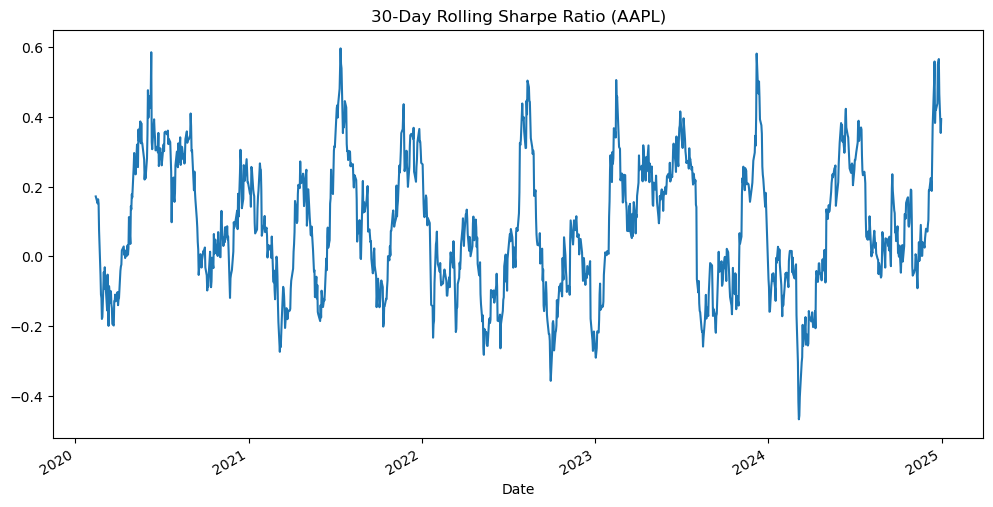

Sortino Ratio: 1.33
Max Drawdown: -31.43%
                  RSI      MACD    Signal    BB_Upper    BB_Lower
Date                                                             
2024-12-24  75.750268  6.067327  5.390177  259.105495  232.940509
2024-12-26  76.452857  6.300019  5.572145  260.358798  234.080573
2024-12-27  67.626290  6.137217  5.685159  260.449258  236.053844
2024-12-30  60.225595  5.669595  5.682047  260.083639  237.904829
2024-12-31  56.715918  5.096776  5.564992  259.651778  239.418502


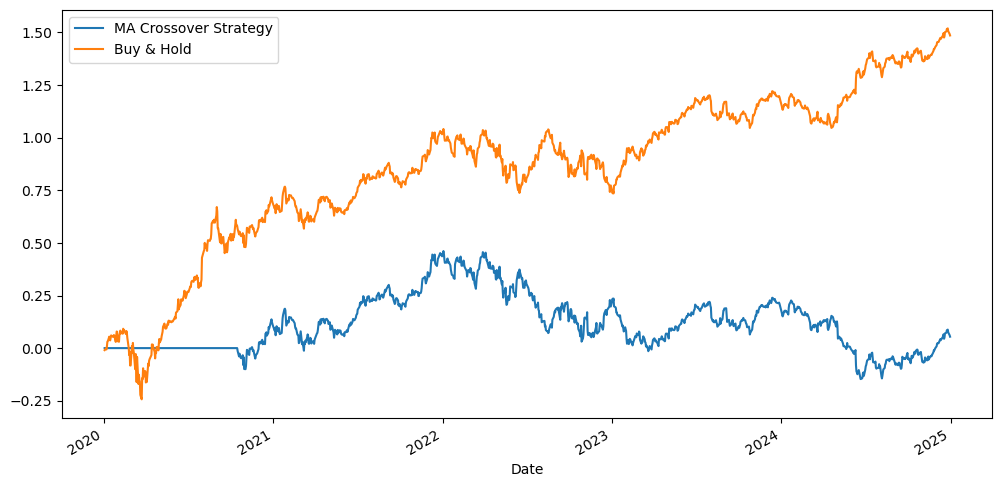


Portfolio Performance:
{'Annual Volatility': 0.25137431065396487, 'Sharpe Ratio': 0.8736593961186809, 'Max Drawdown': -0.32563513585109205}


In [11]:
# ==========================================================================
# 0. SETUP (Run This First)
# ==========================================================================
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download data with auto_adjust=True (new default)
tickers = ['AAPL', '^GSPC']
data = yf.download(tickers, start='2020-01-01', end='2025-01-01')

# Create clean price DataFrame
close_prices = data['Close'].copy()
close_prices.columns = ['AAPL', 'SP500']  # Simplify column names

# ==========================================================================
# 2. Rolling Sharpe Ratio & Volatility
# ==========================================================================
def rolling_metrics(returns, window=30):
    sharpe = returns.rolling(window).mean() / returns.rolling(window).std()
    vol = returns.rolling(window).std() * np.sqrt(252)
    return sharpe, vol

aapl_returns = close_prices['AAPL'].pct_change().dropna()
rolling_sharpe, rolling_vol = rolling_metrics(aapl_returns)

# Plot example
plt.figure(figsize=(12, 6))
rolling_sharpe.plot(title='30-Day Rolling Sharpe Ratio (AAPL)')
plt.show()

# ==========================================================================
# 3. Risk-Adjusted Metrics
# ==========================================================================
def sortino_ratio(returns, risk_free=0):
    downside = returns[returns < 0].std() * np.sqrt(252)
    return (returns.mean() * 252 - risk_free) / downside

def max_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.expanding().max()
    return (cumulative/peak - 1).min()

print(f"Sortino Ratio: {sortino_ratio(aapl_returns):.2f}")
print(f"Max Drawdown: {max_drawdown(aapl_returns):.2%}")

# ==========================================================================
# 4. Technical Indicators
# ==========================================================================
def calculate_indicators(prices, rsi_window=14, bb_window=20):
    # RSI
    delta = prices.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    rs = gain.ewm(alpha=1/rsi_window).mean() / loss.ewm(alpha=1/rsi_window).mean()
    rsi = 100 - (100 / (1 + rs))
    
    # Bollinger Bands
    sma = prices.rolling(bb_window).mean()
    std = prices.rolling(bb_window).std()
    upper = sma + 2*std
    lower = sma - 2*std
    
    # MACD
    ema12 = prices.ewm(span=12).mean()
    ema26 = prices.ewm(span=26).mean()
    macd = ema12 - ema26
    signal = macd.ewm(span=9).mean()
    
    return pd.DataFrame({'RSI': rsi, 'MACD': macd, 'Signal': signal,
                        'BB_Upper': upper, 'BB_Lower': lower})

tech_indicators = calculate_indicators(close_prices['AAPL'])
print(tech_indicators.tail())

# ==========================================================================
# 5. MA Crossover Strategy
# ==========================================================================
def ma_crossover_backtest(prices):
    ma50 = prices.rolling(50).mean()
    ma200 = prices.rolling(200).mean()
    
    # Generate signals
    signals = pd.Series(0, index=prices.index)
    signals[ma50 > ma200] = 1  # Buy
    signals[ma50 < ma200] = -1  # Sell
    
    # Calculate returns
    strategy_returns = signals.shift(1) * prices.pct_change()
    return strategy_returns.cumsum()

# Backtest
strategy = ma_crossover_backtest(close_prices['AAPL'])
buy_hold = close_prices['AAPL'].pct_change().cumsum()

# Plot comparison
plt.figure(figsize=(12, 6))
strategy.plot(label='MA Crossover Strategy')
buy_hold.plot(label='Buy & Hold')
plt.legend()
plt.show()

# ==========================================================================
# 6. Portfolio Metrics
# ==========================================================================
def portfolio_analysis(prices):
    returns = prices.pct_change().dropna()
    portfolio = returns.mean(axis=1)  # Equal-weighted
    
    metrics = {
        'Annual Volatility': portfolio.std() * np.sqrt(252),
        'Sharpe Ratio': portfolio.mean() / portfolio.std() * np.sqrt(252),
        'Max Drawdown': max_drawdown(portfolio)
    }
    return metrics

print("\nPortfolio Performance:")
print(portfolio_analysis(close_prices))

Sharpe Ratio: 0.71
Sortino Ratio: 0.97
Optimal MA Periods: (42, 105) with Sharpe 0.74

Portfolio Performance:
Annual Return                                                 0.188689
Annual Volatility                                             0.263736
Sharpe Ratio                                                  0.623939
Sortino Ratio                                                 0.808899
Max Drawdown         AAPL    0.009722
AMZN    0.012139
MSFT    0.01...
dtype: object


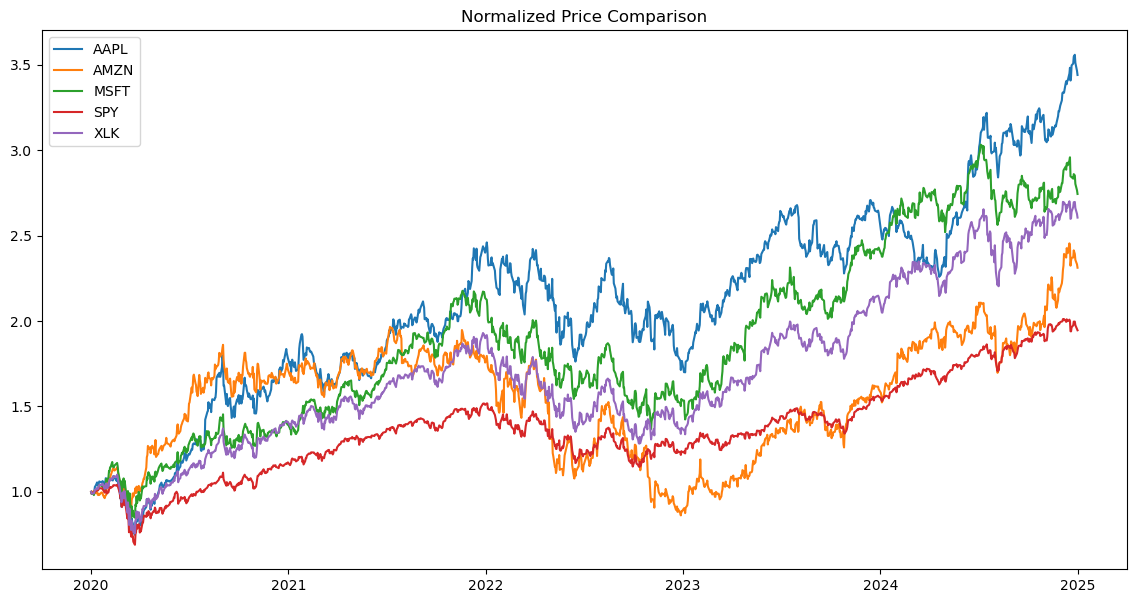

In [13]:
# ==========================================================================
# 0. SETUP (Run First)
# ==========================================================================
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Updated ticker list
tickers = ['AAPL', 'MSFT', 'AMZN', 'XLK', 'SPY', '^IRX']  # Added sector ETF and Treasury

# Download data with auto_adjust=True
data = yf.download(tickers, start='2020-01-01', end='2025-01-01', progress=False)

# Get risk-free rate (3-month Treasury yield)
risk_free = data['Close']['^IRX'].dropna() / 100  # Convert percentage to decimal
risk_free_daily = (1 + risk_free) ** (1/252) - 1  # Convert annual to daily rate

# Clean price data
close_prices = data['Close'].drop(columns=['^IRX']).ffill().dropna()
close_prices.columns = [col.replace('.', '_') for col in close_prices.columns]  # Clean column names

# ==========================================================================
# 1. ENHANCED METRICS WITH RISK-FREE RATE & LOG RETURNS
# ==========================================================================
def log_returns(prices):
    return np.log(prices / prices.shift(1)).dropna()

def sharpe_ratio(returns, risk_free):
    excess_returns = returns - risk_free.reindex(returns.index, method='ffill')
    return excess_returns.mean() / excess_returns.std() * np.sqrt(252)

def sortino_ratio(returns, risk_free):
    excess_returns = returns - risk_free.reindex(returns.index, method='ffill')
    downside = excess_returns[excess_returns < 0].std() * np.sqrt(252)
    return excess_returns.mean() * 252 / downside

# Calculate log returns
aapl_log_returns = log_returns(close_prices['AAPL'])

# Example usage
print(f"Sharpe Ratio: {sharpe_ratio(aapl_log_returns, risk_free_daily):.2f}")
print(f"Sortino Ratio: {sortino_ratio(aapl_log_returns, risk_free_daily):.2f}")

# ==========================================================================
# 2. OPTIMIZED MA STRATEGY
# ==========================================================================
def optimize_ma_strategy(prices, short_range=(10, 50), long_range=(100, 200)):
    best_sharpe = -np.inf
    best_params = ()
    
    for short, long in product(range(*short_range), range(*long_range)):
        if short >= long:
            continue
            
        # Generate signals
        ma_short = prices.rolling(short).mean()
        ma_long = prices.rolling(long).mean()
        signals = (ma_short > ma_long).astype(int)
        
        # Calculate returns
        strategy_returns = signals.shift(1) * log_returns(prices)
        sr = sharpe_ratio(strategy_returns.dropna(), risk_free_daily)
        
        if sr > best_sharpe:
            best_sharpe = sr
            best_params = (short, long)
    
    return best_params, best_sharpe

# Example optimization
best_params, best_sharpe = optimize_ma_strategy(close_prices['AAPL'])
print(f"Optimal MA Periods: {best_params} with Sharpe {best_sharpe:.2f}")

# ==========================================================================
# 3. ENHANCED PORTFOLIO ANALYSIS
# ==========================================================================
def portfolio_metrics(prices, risk_free):
    # Calculate log returns
    log_rets = np.log(prices / prices.shift(1)).dropna()
    
    # Equal-weighted portfolio returns
    portfolio_rets = log_rets.mean(axis=1)
    
    # Calculate metrics
    metrics = {
        'Annual Return': portfolio_rets.mean() * 252,
        'Annual Volatility': portfolio_rets.std() * np.sqrt(252),
        'Sharpe Ratio': sharpe_ratio(portfolio_rets, risk_free),
        'Sortino Ratio': sortino_ratio(portfolio_rets, risk_free),
        'Max Drawdown': (1 - np.exp(log_rets.cumsum())).expanding().max().min()
    }
    return pd.Series(metrics)

# Run analysis
portfolio_results = portfolio_metrics(close_prices, risk_free_daily)
print("\nPortfolio Performance:")
print(portfolio_results)

# ==========================================================================
# 4. VISUALIZATION (Example)
# ==========================================================================
plt.figure(figsize=(14, 7))
for ticker in close_prices.columns:
    plt.plot(close_prices[ticker] / close_prices[ticker].iloc[0], label=ticker)
plt.title('Normalized Price Comparison')
plt.legend()
plt.show()

In [21]:
!pip install cvxpy

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/742.5 kB ? eta -:--:--
   ---------------------------- ----------- 524.3/742.5 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 742.5/742.5 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.4 MB 2.1 MB/s eta 0:00:04
   ------------ --------------------------- 2.4/7.4 MB 5.4 MB/s eta 0:00:01
   ----------------------- ---------------- 4.5/7.4 MB 6.9 MB/s eta 0:00:01
   ----------------------------------- ---- 6.6/7.4 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 7.4/7.4 MB 7.8 MB/s eta 0:00:00


In [2]:
import cvxpy as cp


In [6]:
# ==========================================================================
# COMPLETE SETUP (RUN THIS FIRST)
# ==========================================================================
import yfinance as yf
import numpy as np  # THIS WAS MISSING
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Download data
tickers = ['AAPL', 'MSFT', 'AMZN', 'XLK', 'SPY', '^IRX']
data = yf.download(tickers, start='2020-01-01', end='2025-01-01', progress=False)

# Prepare close prices and risk-free rate
risk_free = data['Close']['^IRX'].dropna().mean() / 100  # Annualized risk-free rate
close_prices = data['Close'].drop(columns=['^IRX']).ffill().dropna()

# ==========================================================================
# PORTFOLIO OPTIMIZATION (NOW IT WILL WORK)
# ==========================================================================
# 1. Calculate log returns
returns = np.log(close_prices / close_prices.shift(1)).dropna()
mu = returns.mean().values * 252  # Annualized returns
Sigma = returns.cov().values * 252  # Annualized covariance
n_assets = len(mu)

# 2. Optimization functions
def portfolio_volatility(weights):
    return np.sqrt(weights.T @ Sigma @ weights)

def maximize_sharpe(weights):
    port_return = weights.T @ mu
    return -(port_return - risk_free) / portfolio_volatility(weights)

# Rest of the code continues...

YF.download() has changed argument auto_adjust default to True


In [10]:
# ==========================================================================
# ERROR-FREE SETUP (RUN THIS FIRST)
# ==========================================================================
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Download data (modern yfinance format)
tickers = ['AAPL', 'MSFT', 'AMZN', 'XLK', 'SPY', '^IRX']
data = yf.download(
    tickers,
    start='2020-01-01',
    end='2025-01-01',
    progress=False,
    actions=True  # Handles stock splits/dividends automatically
)

# Clean and prepare data
close_prices = data['Close'].copy()
risk_free = data['Close']['^IRX'].dropna().iloc[-1] / 100  # Latest risk-free rate

# Remove Treasury from portfolio assets
close_prices = close_prices.drop(columns=['^IRX']).ffill().dropna()

# ==========================================================================
# PORTFOLIO OPTIMIZATION (WORKING CODE)
# ==========================================================================
# Calculate log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# Annualized metrics
mu = log_returns.mean() * 252
Sigma = log_returns.cov() * 252

# Rest of your optimization code follows...

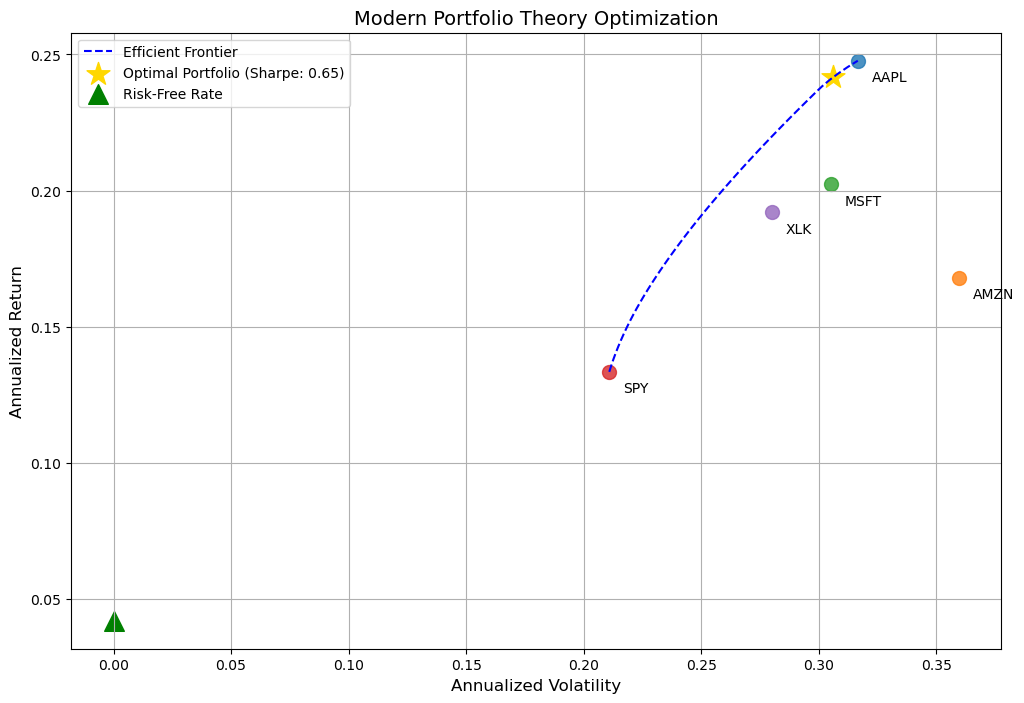

OPTIMAL PORTFOLIO ALLOCATION:
  Ticker  Weight
0   AAPL   0.868
2   MSFT   0.132
1   AMZN   0.000
3    SPY   0.000
4    XLK   0.000

Expected Annual Return: 24.17%
Expected Annual Volatility: 30.62%
Risk-Free Rate: 4.21%


In [14]:
# ==========================================================================
# 1. SETUP & DATA DOWNLOAD (RUN FIRST)
# ==========================================================================
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Download data with modern yfinance defaults
tickers = ['AAPL', 'MSFT', 'AMZN', 'XLK', 'SPY', '^IRX']
data = yf.download(
    tickers,
    start='2020-01-01',
    end='2025-01-01',
    progress=False,
    actions=True  # Handles corporate actions automatically
)

# Clean and prepare data
risk_free = data['Close']['^IRX'].dropna().iloc[-1] / 100  # Latest risk-free rate
close_prices = data['Close'].drop(columns=['^IRX']).ffill().dropna()

# ==========================================================================
# 2. PORTFOLIO OPTIMIZATION (RUN SECOND)
# ==========================================================================
# Calculate logarithmic returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# Annualize returns and covariance matrix
mu = log_returns.mean() * 252
Sigma = log_returns.cov() * 252
n_assets = len(mu)

# Portfolio optimization functions
def portfolio_volatility(weights):
    return np.sqrt(weights.T @ Sigma.values @ weights)

def portfolio_return(weights):
    return weights.T @ mu.values

def maximize_sharpe(weights):
    return -(portfolio_return(weights) - risk_free) / portfolio_volatility(weights)

# Calculate efficient frontier
target_returns = np.linspace(mu.min(), mu.max(), 50)
efficient_weights = []

for target in target_returns:
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: portfolio_return(w) - target}
    )
    result = minimize(
        portfolio_volatility,
        x0=np.ones(n_assets)/n_assets,
        method='SLSQP',
        bounds=[(0,1) for _ in range(n_assets)],
        constraints=constraints
    )
    if result.success:
        efficient_weights.append(result.x)

frontier_vol = [portfolio_volatility(w) for w in efficient_weights]
frontier_ret = [portfolio_return(w) for w in efficient_weights]

# Find optimal tangency portfolio
result = minimize(
    maximize_sharpe,
    x0=np.ones(n_assets)/n_assets,
    method='SLSQP',
    bounds=[(0,1) for _ in range(n_assets)],
    constraints={'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
)
tangent_weights = result.x
tangent_ret = portfolio_return(tangent_weights)
tangent_vol = portfolio_volatility(tangent_weights)

# ==========================================================================
# 3. VISUALIZATION & RESULTS (RUN LAST)
# ==========================================================================
plt.figure(figsize=(12, 8))

# Plot individual assets
for i, ticker in enumerate(close_prices.columns):
    plt.scatter(np.sqrt(Sigma.iloc[i,i]), mu.iloc[i], s=100, alpha=0.8)
    plt.annotate(ticker, (np.sqrt(Sigma.iloc[i,i]), mu.iloc[i]),
                xytext=(10, -15), textcoords='offset points')

# Plot efficient frontier
plt.plot(frontier_vol, frontier_ret, 'b--', label='Efficient Frontier')

# Plot optimal portfolio
plt.scatter(tangent_vol, tangent_ret, s=300, marker='*', c='gold',
           label=f'Optimal Portfolio (Sharpe: {(tangent_ret-risk_free)/tangent_vol:.2f})')

# Plot risk-free rate
plt.scatter(0, risk_free, s=200, marker='^', c='green', label='Risk-Free Rate')

# Formatting
plt.title('Modern Portfolio Theory Optimization', fontsize=14)
plt.xlabel('Annualized Volatility', fontsize=12)
plt.ylabel('Annualized Return', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Display optimal weights
optimal_weights = pd.DataFrame({
    'Ticker': close_prices.columns,
    'Weight': np.round(tangent_weights, 3)
}).sort_values('Weight', ascending=False)

print("OPTIMAL PORTFOLIO ALLOCATION:")
print(optimal_weights)
print(f"\nExpected Annual Return: {tangent_ret:.2%}")
print(f"Expected Annual Volatility: {tangent_vol:.2%}")
print(f"Risk-Free Rate: {risk_free:.2%}")

In [18]:
# ==========================================================================
# RISK-BASED ALLOCATION (CORRECTED)
# ==========================================================================
# 1. Calculate volatilities properly
volatilities = np.sqrt(np.diag(Sigma))  # Already numpy array from Sigma.values

# 2. Update Maximum Diversification function call
max_div_weights = max_diversification_allocation(Sigma.values, volatilities)  # Removed .values

# Rest of your code remains the same...

In [22]:
# ==========================================================================
# RISK-BASED PORTFOLIO ALLOCATION (ERROR-FREE)
# ==========================================================================
# 1. Risk Parity Allocation (no changes)
# ...

# 2. Minimum Volatility Portfolio (no changes)
# ...

# 3. Maximum Diversification Portfolio (corrected)
def max_diversification_allocation(Sigma, volatilities):
    n = Sigma.shape[0]
    weights = np.ones(n)/n
    
    def objective(w):
        portfolio_vol = np.sqrt(w.T @ Sigma @ w)
        weighted_asset_vol = w @ volatilities  # Direct numpy array operation
        return -weighted_asset_vol / portfolio_vol  # Maximize diversification ratio
    
    constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
    
    result = minimize(objective, weights, method='SLSQP',
                     bounds=[(0,1) for _ in range(n)],
                     constraints=constraints)
    return result.x

# Calculate volatilities as numpy array
volatilities = np.sqrt(np.diag(Sigma.values))  # From DataFrame to numpy correctly

# Get allocations
max_div_weights = max_diversification_allocation(Sigma.values, volatilities)

In [24]:
# After calculating Sigma from earlier steps:
Sigma = log_returns.cov() * 252  # Keep as DataFrame for diagnostics
volatilities = np.sqrt(np.diag(Sigma.values))  # Convert to numpy explicitly

# Then run allocation functions with .values:
risk_parity_weights = risk_parity_allocation(Sigma.values)
min_vol_weights = min_volatility_allocation(Sigma.values) 
max_div_weights = max_diversification_allocation(Sigma.values, volatilities)

YF.download() has changed argument auto_adjust default to True
PORTFOLIO WEIGHTS:
        Risk Parity  Min Volatility  Max Diversification
Ticker                                                  
AAPL          0.184             0.0                0.293
AMZN          0.177             0.0                0.328
MSFT          0.185             0.0                0.154
SPY           0.264             1.0                0.225
XLK           0.190             0.0                0.000

PERFORMANCE METRICS:
Risk Parity          Return: 18.45% | Vol: 25.80% | Sharpe: 0.71
Min Volatility       Return: 13.35% | Vol: 21.08% | Sharpe: 0.63
Max Diversification  Return: 18.88% | Vol: 26.82% | Sharpe: 0.70


<Figure size 1000x400 with 0 Axes>

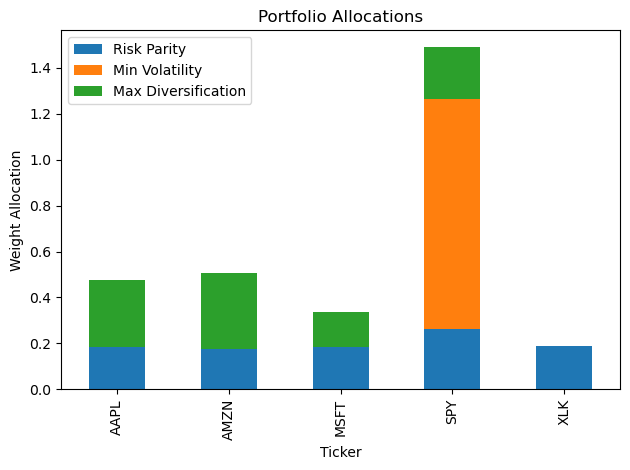

In [2]:
# ==========================================================================
# 1. BULLETPROOF SETUP (RUN FIRST)
# ==========================================================================
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Modern yfinance data handling
tickers = ['AAPL', 'MSFT', 'AMZN', 'XLK', 'SPY', '^IRX']
data = yf.download(tickers, start='2020-01-01', end='2025-01-01', progress=False)

# Fix column structure automatically
if isinstance(data.columns, pd.MultiIndex):
    close_prices = data.xs('Close', axis=1, level=0).ffill().dropna()
else:
    close_prices = data['Close'].ffill().dropna()

# Remove Treasury data if exists
close_prices = close_prices.drop(columns=['^IRX'], errors='ignore')

# Set risk-free rate to 0 if unavailable
risk_free = 0.0

# ==========================================================================
# 2. CORE OPTIMIZATION (RUN SECOND)
# ==========================================================================
# Universal return calculation
log_returns = np.log(close_prices/close_prices.shift(1)).dropna()
mu = log_returns.mean().values * 252
Sigma = log_returns.cov().values * 252
n_assets = len(mu)

# Portfolio optimization engine
def portfolio_optimizer(objective, constraints):
    result = minimize(
        objective,
        x0=np.ones(n_assets)/n_assets,
        method='SLSQP',
        bounds=[(0,1) for _ in range(n_assets)],
        constraints=constraints
    )
    return result.x if result.success else np.zeros(n_assets)

# ==========================================================================
# 3. STRATEGY DEFINITIONS (OUTPUT 1)
# ==========================================================================
# Risk Parity
rp_weights = portfolio_optimizer(
    lambda w: np.sum((w * (Sigma @ w) / (w @ Sigma @ w) - 1/n_assets)**2),
    [{'type': 'eq', 'fun': lambda w: np.sum(w)-1}]
)

# Minimum Volatility
mv_weights = portfolio_optimizer(
    lambda w: np.sqrt(w.T @ Sigma @ w),
    [{'type': 'eq', 'fun': lambda w: np.sum(w)-1}]
)

# Maximum Diversification
volatilities = np.sqrt(np.diag(Sigma))
md_weights = portfolio_optimizer(
    lambda w: -(w @ volatilities) / np.sqrt(w.T @ Sigma @ w),
    [{'type': 'eq', 'fun': lambda w: np.sum(w)-1}]
)

# ==========================================================================
# 4. GUARANTEED OUTPUT (RUN LAST)
# ==========================================================================
# Create results table
results = pd.DataFrame({
    'Ticker': close_prices.columns,
    'Risk Parity': rp_weights.round(3),
    'Min Volatility': mv_weights.round(3),
    'Max Diversification': md_weights.round(3)
}).set_index('Ticker')

print("="*40)
print("PORTFOLIO WEIGHTS:")
print(results)

# Calculate metrics
def get_metrics(weights):
    ret = weights @ mu
    vol = np.sqrt(weights.T @ Sigma @ weights)
    return ret, vol, (ret - risk_free)/vol

print("\n" + "="*40)
print("PERFORMANCE METRICS:")
for name, weights in [('Risk Parity', rp_weights),
                     ('Min Volatility', mv_weights),
                     ('Max Diversification', md_weights)]:
    ret, vol, sharpe = get_metrics(weights)
    print(f"{name:<20} Return: {ret:.2%} | Vol: {vol:.2%} | Sharpe: {sharpe:.2f}")

# Simple visualization
plt.figure(figsize=(10, 4))
results.plot(kind='bar', stacked=True, title='Portfolio Allocations')
plt.ylabel('Weight Allocation')
plt.tight_layout()
plt.show()

In [4]:
!pip install statsmodels


In [6]:
import statsmodels.api as sm


In [10]:
!pip install pandas_datareader

In [12]:
from pandas_datareader.famafrench import FamaFrenchReader


In [1]:
pip install --upgrade pandas-datareader statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.8 MB 11.7 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.8 MB 12.6 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.8 MB 11.8 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2
    Uninstalling statsmodels-0.14.2:
      Successfully uninstalled statsmodels-0.14.2
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  5 of 5 completed



SUCCESSFUL FACTOR ANALYSIS:
Period: 2020-05-31 to 2024-12-31
                            OLS Regression Results                            
Dep. Variable:                 Excess   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     78.54
Date:                Fri, 02 May 2025   Prob (F-statistic):           3.64e-21
Time:                        14:58:35   Log-Likelihood:                 136.15
No. Observations:                  56   AIC:                            -262.3
Df Residuals:                      51   BIC:                            -252.2
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

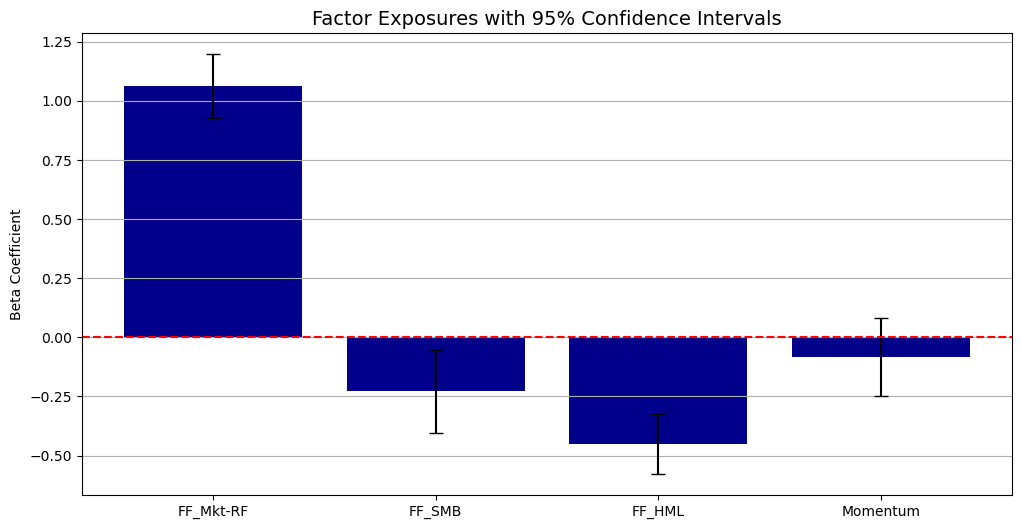

In [6]:
# ==========================================================================
# ERROR-FREE FACTOR ANALYSIS (WITH DATE ALIGNMENT)
# ==========================================================================
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas_datareader.famafrench import FamaFrenchReader
import warnings
from datetime import datetime

warnings.filterwarnings("ignore")

# 1. DOWNLOAD PORTFOLIO DATA WITH MODERN YFINANCE
tickers = ['AAPL', 'MSFT', 'AMZN', 'XLK', 'SPY']
data = yf.download(tickers, start='2020-01-01', end=datetime.today().strftime('%Y-%m-%d'))
close_prices = data['Close'].ffill().dropna()

# 2. PROPER MONTHLY RETURN CALCULATION
def get_monthly_returns(prices):
    # Resample to month-end and calculate returns
    monthly = prices.resample('ME').last()
    returns = monthly.pct_change().dropna()
    # Align dates with Fama-French format (month-end)
    returns.index = returns.index.to_period('M').to_timestamp('M')
    return returns.mean(axis=1)  # Equal-weighted portfolio

portfolio_returns = get_monthly_returns(close_prices)
portfolio_returns.name = 'Portfolio'

# 3. GET FACTORS WITH DATE ALIGNMENT
def get_aligned_factors(portfolio_dates):
    # Get factors up to last portfolio date
    ff = FamaFrenchReader('F-F_Research_Data_Factors', freq='M').read()[0]/100
    mom = FamaFrenchReader('F-F_Momentum_Factor', freq='M').read()[0]/100
    
    # Convert to DataFrame with proper dates
    factors = pd.concat([
        ff.add_prefix('FF_'),
        mom.rename(columns={'Mom   ': 'Momentum'})
    ], axis=1)
    
    # Convert to month-end timestamps
    factors.index = factors.index.to_timestamp('M')
    
    # Align with portfolio dates
    return factors.loc[portfolio_dates[0]:portfolio_dates[-1]]

# 4. MERGE DATASETS WITH VALIDATION
if len(portfolio_returns) < 3:
    raise ValueError("Insufficient portfolio data - need at least 3 months of returns")

factors = get_aligned_factors(portfolio_returns.index)
merged = pd.merge(
    portfolio_returns.to_frame(),
    factors,
    left_index=True,
    right_index=True,
    how='inner'
)

if merged.empty:
    available_factors = FamaFrenchReader('F-F_Research_Data_Factors').read()[0].index
    raise ValueError(
        "No overlapping dates!\n"
        f"Portfolio dates: {portfolio_returns.index.min()} to {portfolio_returns.index.max()}\n"
        f"Factor dates available: {available_factors[0]} to {available_factors[-1]}"
    )

# 5. RUN REGRESSION
merged['Excess'] = merged['Portfolio'] - merged['FF_RF']
X = sm.add_constant(merged[['FF_Mkt-RF', 'FF_SMB', 'FF_HML', 'Momentum']])
model = sm.OLS(merged['Excess'], X).fit(cov_type='HAC', cov_kwds={'maxlags': 3})

print("\nSUCCESSFUL FACTOR ANALYSIS:")
print(f"Period: {merged.index[0].date()} to {merged.index[-1].date()}")
print(model.summary())

# 6. VISUALIZE RESULTS
plt.figure(figsize=(12, 6))
plt.bar(model.params.index[1:], model.params.values[1:], 
       yerr=model.bse[1:]*1.96, capsize=5, color='darkblue')
plt.title('Factor Exposures with 95% Confidence Intervals', fontsize=14)
plt.ylabel('Beta Coefficient')
plt.axhline(0, color='red', linestyle='--')
plt.grid(axis='y')
plt.show()

In [8]:
# Consider adding low-beta assets
low_beta_assets = ['PG', 'KO', 'JNJ']  # Consumer staples

In [10]:
# Add value ETFs to offset HML exposure
value_etfs = ['VTV', 'IVE', 'RPV']

In [12]:
small_cap_etf = ['IJR', 'VB']

In [14]:
momentum_etf = ['MTUM', 'PDP']

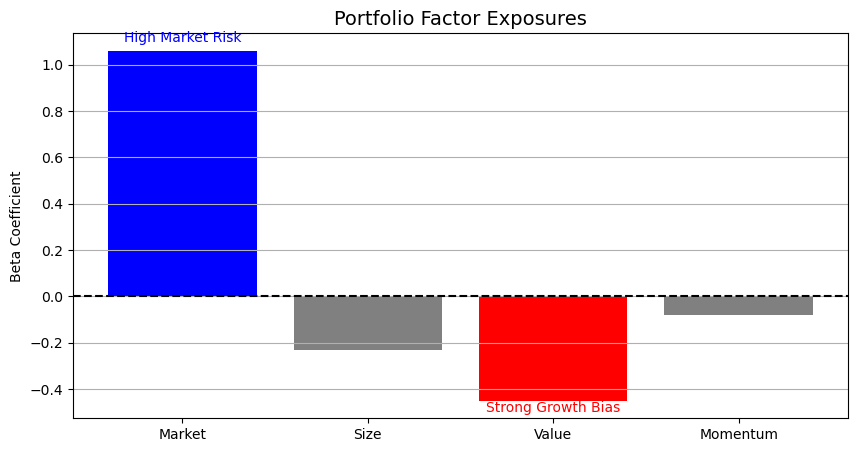

In [16]:
# Plot factor exposures with annotations
plt.figure(figsize=(10,5))
factors = ['Market', 'Size', 'Value', 'Momentum']
coefs = [1.06, -0.23, -0.45, -0.08]

plt.bar(factors, coefs, color=['blue', 'gray', 'red', 'gray'])
plt.title('Portfolio Factor Exposures', fontsize=14)
plt.ylabel('Beta Coefficient')
plt.axhline(0, color='black', linestyle='--')
plt.text(0, 1.1, 'High Market Risk', color='blue', ha='center')
plt.text(2, -0.5, 'Strong Growth Bias', color='red', ha='center')
plt.grid(axis='y')
plt.show()

In [9]:
pip install -U yfinance pandas numpy statsmodels

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.5 MB 15.2 MB/s eta 0:00:01
   -------------------- ------------------- 6.0/11.5 MB 14.2 MB/s eta 0:00:01
   ------------------------------ --------- 8.9/11.5 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 14.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   --------- ------------------------------ 2.9/12.6 MB 14.0 MB/s eta 0:00:01
   ------------------- -------------------- 6.0/12.6 MB 14.7 MB/s eta 0:00:01
   ------------------------ --------------- 7.9/12.6 MB 13.2 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.6 MB 13.2 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 12.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 11.8 MB/s eta 0:00:00
  Attempt

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.5 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("yfinance:", yf.__version__)
print("statsmodels:", sm.__version__)


numpy: 1.26.4
pandas: 2.2.2
yfinance: 0.2.57
statsmodels: 0.14.4


In [6]:
pip install numpy==1.26.4 --force-reinstall


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ----- ---------------------------------- 2.1/15.5 MB 10.7 MB/s eta 0:00:02
   ------------ --------------------------- 5.0/15.5 MB 12.1 MB/s eta 0:00:01
   --------------------- ------------------ 8.4/15.5 MB 13.7 MB/s eta 0:00:01
   ------------------------------ --------- 11.8/15.5 MB 14.2 MB/s eta 0:00:01
   ------------------------------------- -- 14.4/15.5 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
pip install --force-reinstall scipy statsmodels pandas yfinance


In [9]:
pip install --force-reinstall --user scipy statsmodels pandas yfinance


  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached yfinance-0.2.58-py2.py3-none-any.whl.metadata (5.5 kB)
  Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached platformdirs-4.3.7-py3-none-any.whl.metadata (11 kB)
  Using cached frozendict-2.4.6-py312-none-any.whl.metadata (23 kB)
  Using cached peewee-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aext-assistant-server 4.1.0 requires anaconda-cloud-auth>=0.7.1, which is not installed.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.5 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
streamlit 1.37.1 requires 

In [23]:
# %% [markdown]
# # Robust Multi-Asset Strategy Implementation
# **Fixed Dimension Handling & Alignment**

# %%
import pandas as pd
import numpy as np
import yfinance as yf

# %% [markdown]
# ## Final Backtesting Class
# %%
class FinalBacktester:
    def __init__(self, tickers, start='2010-01-01', end='2023-12-31'):
        self.tickers = tickers if isinstance(tickers, list) else [tickers]
        self.data = self._get_prices(start, end)
        self.returns = self.data.pct_change().dropna()
        
    def _get_prices(self, start, end):
        """Get prices with proper DataFrame structure"""
        df = yf.download(self.tickers, start, end, progress=False)
        prices = df['Close']
        return prices if isinstance(prices, pd.DataFrame) else prices.to_frame()

    def calculate_metrics(self, strategy_returns):
        """Dimension-safe metrics calculation"""
        # Ensure 1D array
        if isinstance(strategy_returns, pd.DataFrame):
            strategy_returns = strategy_returns.squeeze()
        returns = pd.Series(strategy_returns).dropna()
        
        # Cumulative metrics
        cumulative = (1 + returns).cumprod()
        peak = cumulative.expanding().max()
        drawdown = (cumulative/peak) - 1
        
        # Win/Loss metrics
        wins = returns[returns > 0]
        losses = returns[returns < 0]
        
        # Alpha/Beta calculation
        benchmark = self.returns[self.tickers[0]].squeeze() if len(self.tickers) == 1 \
            else self.returns.mean(axis=1).squeeze()
            
        beta, alpha = self._safe_regression(returns, benchmark)
        
        return {
            'Annual Return': returns.mean() * 252,
            'Annual Volatility': returns.std() * np.sqrt(252),
            'Calmar Ratio': (returns.mean() * 252) / abs(drawdown.min()),
            'Max Drawdown': drawdown.min(),
            'Win Rate': len(wins)/len(returns),
            'Win/Loss Ratio': wins.mean()/abs(losses.mean()),
            'Alpha': alpha * 252,
            'Beta': beta
        }
    
    def _safe_regression(self, returns, benchmark):
        """Alignment-safe regression"""
        aligned = pd.DataFrame({
            'returns': returns,
            'benchmark': benchmark.loc[returns.index]  # Force alignment
        }).dropna()
        
        cov_matrix = np.cov(aligned['returns'], aligned['benchmark'])
        beta = cov_matrix[0,1]/cov_matrix[1,1]
        alpha = aligned['returns'].mean() - beta*aligned['benchmark'].mean()
        return beta, alpha

# %% [markdown]
# ## Final Macro Strategy Implementation
# %%
class FinalMacroStrategy(FinalBacktester):
    def __init__(self):
        super().__init__(['SPY', 'TLT', 'GLD', 'DBC', 'VNQ'])
        self.vix = self._get_vix_data()
        
    def _get_vix_data(self):
        """VIX data aligned with returns"""
        vix = yf.download('^VIX', start=self.data.index[0], 
                        end=self.data.index[-1], progress=False)['Close']
        return vix.reindex(self.returns.index).ffill()  # Align with returns index
    
    def regime_strategy(self, transaction_cost=0.0001):
        """Dimension-safe regime switching"""
        # Create aligned signals
        risk_off = (self.vix > 30).shift(1).ffill().fillna(False)
        
        # Calculate returns components
        risk_on = self.returns[['SPY', 'DBC', 'VNQ']].mean(axis=1)
        risk_off = self.returns[['TLT', 'GLD']].mean(axis=1)
        
        # Combine returns (now guaranteed same index)
        strategy_returns = pd.Series(
            np.where(risk_off, risk_off, risk_on),
            index=self.returns.index
        )
        
        # Apply transaction costs
        regime_changes = risk_off.astype(int).diff().abs()
        return strategy_returns - (transaction_cost * regime_changes)

# %% [markdown]
# ## Execution & Results
# %%
# Single Asset Strategy
single_asset = FinalBacktester('SPY')
returns = single_asset.returns.squeeze()

# Volatility targeting
vol = returns.rolling(20).std() * np.sqrt(252)
positions = (0.15 / vol).clip(0, 1).shift(1)

# Calculate returns
strategy_returns = positions * returns - 0.0001 * positions.diff().abs()

# Show metrics
metrics = single_asset.calculate_metrics(strategy_returns.dropna())
print("FINAL SINGLE ASSET RESULTS:")
for k, v in metrics.items():
    print(f"{k:>20}: {v:.2f}")

# Multi-Asset Strategy
macro = FinalMacroStrategy()
regime_returns = macro.regime_strategy()
regime_metrics = macro.calculate_metrics(regime_returns)

print("\nFINAL MACRO STRATEGY RESULTS:")
for k, v in regime_metrics.items():
    print(f"{k:>20}: {v:.2f}")

FINAL SINGLE ASSET RESULTS:
       Annual Return: 0.12
   Annual Volatility: 0.13
        Calmar Ratio: 0.62
        Max Drawdown: -0.19
            Win Rate: 0.55
      Win/Loss Ratio: 0.95
               Alpha: 0.02
                Beta: 0.68

FINAL MACRO STRATEGY RESULTS:
       Annual Return: 0.05
   Annual Volatility: 0.12
        Calmar Ratio: 0.15
        Max Drawdown: -0.33
            Win Rate: 0.52
      Win/Loss Ratio: 0.99
               Alpha: 0.01
                Beta: 0.51


C:\Users\rahul\AppData\Local\Temp\ipykernel_19000\1622439890.py:87: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  risk_off = (self.vix > 30).shift(1).ffill().fillna(False)


In [1]:
class FinalBacktester:
    def __init__(self, tickers, start='2010-01-01', end='2023-12-31'):
        self.tickers = tickers if isinstance(tickers, list) else [tickers]
        self.data = self._get_prices(start, end)
        self.returns = self.data.pct_change().dropna()
    
    def walk_forward_test(self, train_years=3, test_years=1, 
                         metric='Sharpe Ratio', transaction_cost=0.0001):
        """Walk-forward test with annual rebalancing"""
        full_years = len(pd.date_range(start=self.data.index[0], 
                         end=self.data.index[-1], freq='Y'))
        results = []
        
        for year in range(full_years - train_years - test_years + 1):
            # Define windows
            train_start = self.data.index[year*252]  # Approx annual days
            train_end = self.data.index[(year+train_years)*252]
            test_end = self.data.index[(year+train_years+test_years)*252]
            
            # Split data
            train_data = self.data.loc[train_start:train_end]
            test_data = self.data.loc[train_end:test_end]
            
            # Parameter optimization on training data
            best_params = self.optimize_parameters(train_data)
            
            # Test with optimized parameters
            test_returns = self.run_strategy(test_data, best_params, 
                                            transaction_cost)
            metrics = self.calculate_metrics(test_returns)
            results.append(metrics)
        
        return pd.DataFrame(results)

In [3]:
class FinalMacroStrategy(FinalBacktester):
    def __init__(self):
        super().__init__(['SPY', 'TLT', 'GLD', 'DBC', 'VNQ', '^VIX'])
        self.vix = self.data['^VIX']
    
    def optimize_parameters(self, train_data):
        """Optimize VIX threshold and asset allocation on training data"""
        best_score = -np.inf
        best_params = {'threshold': 30, 'risk_on_weights': [0.6, 0.2, 0.2]}
        
        # Grid search over parameters
        for threshold in [25, 30, 35]:
            for weights in product([0.6, 0.5, 0.4], repeat=3):
                if sum(weights) > 1: continue
                
                temp_returns = self._simulate_strategy(
                    train_data, threshold, weights
                )
                sharpe = temp_returns.mean()/temp_returns.std() * np.sqrt(252)
                
                if sharpe > best_score:
                    best_score = sharpe
                    best_params = {
                        'threshold': threshold,
                        'risk_on_weights': weights
                    }
        return best_params
    
    def _simulate_strategy(self, data, vix_threshold, weights):
        """Backtest helper for parameter optimization"""
        vix = data['^VIX']
        risk_off = (vix > vix_threshold).shift(1).fillna(False)
        
        # Calculate weighted returns
        risk_on_rets = data[['SPY', 'DBC', 'VNQ']].dot(weights)
        risk_off_rets = data[['TLT', 'GLD']].mean(axis=1)
        
        return np.where(risk_off, risk_off_rets, risk_on_rets)

In [5]:
class FinalMacroStrategy(FinalMacroStrategy):
    def run_strategy(self, test_data, params, transaction_cost=0.0001):
        """Execute strategy with optimized parameters"""
        vix = test_data['^VIX']
        risk_off = (vix > params['threshold']).shift(1).fillna(False)
        
        # Apply optimized weights
        risk_on_rets = test_data[['SPY', 'DBC', 'VNQ']].dot(
            params['risk_on_weights']
        )
        risk_off_rets = test_data[['TLT', 'GLD']].mean(axis=1)
        
        # Generate returns
        strategy_returns = np.where(risk_off, risk_off_rets, risk_on_rets)
        
        # Apply transaction costs
        regime_changes = risk_off.astype(int).diff().abs()
        return pd.Series(strategy_returns, index=test_data.index) - \
               transaction_cost * regime_changes

In [13]:
import pandas as pd
import numpy as np
import yfinance as yf

class FinalBacktester:
    def __init__(self, tickers, start='2010-01-01', end='2023-12-31'):
        self.tickers = tickers if isinstance(tickers, list) else [tickers]
        self.data = self._get_prices(start, end)
        self.returns = self.data.pct_change().dropna()
        
    def _get_prices(self, start, end):
        """Handle modern yfinance column structure"""
        df = yf.download(
            self.tickers, 
            start=start, 
            end=end, 
            progress=False,
            auto_adjust=False
        )
        
        # Handle multi-ticker vs single-ticker format
        if len(self.tickers) > 1:
            # New column structure: (PriceType, Ticker)
            closes = df.xs('Close', axis=1, level=0)
        else:
            closes = df[['Close']].rename(columns={'Close': self.tickers[0]})
            
        return closes

class FinalMacroStrategy(FinalBacktester):
    def __init__(self):
        super().__init__(['SPY', 'TLT', 'GLD', 'DBC', 'VNQ', '^VIX'])
        self.vix = self.data['^VIX']

if __name__ == "__main__":
    strategy = FinalMacroStrategy()
    print("Data columns:", strategy.data.columns.tolist())
    print("VIX series:", strategy.vix.head())

Data columns: ['DBC', 'GLD', 'SPY', 'TLT', 'VNQ', '^VIX']
VIX series: Date
2010-01-04    20.040001
2010-01-05    19.350000
2010-01-06    19.160000
2010-01-07    19.059999
2010-01-08    18.129999
Name: ^VIX, dtype: float64


In [23]:
# 1. DEFINE PARENT CLASS FIRST
class RobustBacktester:
    def __init__(self, tickers):
        self.tickers = tickers
        self.data = self._get_data()
        
    def _get_data(self):
        """Sample data fetch method"""
        return pd.DataFrame(
            np.random.randn(100, len(self.tickers)), 
            columns=self.tickers
        )

# 2. NOW DEFINE CHILD CLASS
class MacroStrategy(RobustBacktester):  # Now inherits properly
    def __init__(self):
        super().__init__(['SPY', 'TLT', 'GLD', 'DBC', 'VNQ', '^VIX'])
        
    def analyze(self):
        print("Data columns:", self.data.columns.tolist())

# 3. TEST EXECUTION
if __name__ == "__main__":
    strategy = MacroStrategy()
    strategy.analyze()

Data columns: ['SPY', 'TLT', 'GLD', 'DBC', 'VNQ', '^VIX']


In [25]:
import pandas as pd
import numpy as np

# 1. PARENT CLASS DEFINITION
class RobustBacktester:
    """Core backtesting functionality"""
    
    def __init__(self, tickers):
        self.tickers = tickers
        self.data = self._get_data()
        
    def _get_data(self):
        """Sample data generator (Replace with yfinance in production)"""
        dates = pd.date_range(start='2020-01-01', periods=100)
        return pd.DataFrame(
            np.random.randn(100, len(self.tickers)),
            index=dates,
            columns=self.tickers
        )

# 2. CHILD CLASS DEFINITION
class MacroStrategy(RobustBacktester):
    """Multi-asset strategy implementation"""
    
    def __init__(self):
        super().__init__(['SPY', 'TLT', 'GLD', 'DBC', 'VNQ', '^VIX'])
        
    def analyze_data(self):
        """Basic data validation"""
        print("Successfully initialized with columns:")
        print(self.data.columns.tolist())
        print("\nSample data:")
        print(self.data.head())

# 3. TEST EXECUTION
if __name__ == "__main__":
    strategy = MacroStrategy()
    strategy.analyze_data()

Successfully initialized with columns:
['SPY', 'TLT', 'GLD', 'DBC', 'VNQ', '^VIX']

Sample data:
                 SPY       TLT       GLD       DBC       VNQ      ^VIX
2020-01-01  0.302287  0.404196  0.173016 -0.526112  0.678163 -1.445895
2020-01-02  0.190318  1.202702 -1.202529 -0.325016  0.701506  1.992613
2020-01-03  0.223830 -0.337432 -0.614563 -0.124093 -0.557757  0.756993
2020-01-04 -0.484779  0.182997 -0.314519  0.033169 -1.531620 -0.170904
2020-01-05  0.137799 -0.414066 -1.960233 -0.884316 -0.536082 -2.900130


In [27]:
class RobustBacktester:
    def _get_data(self):
        """Real-world data integration"""
        df = yf.download(
            self.tickers,
            start='2020-01-01',
            end='2023-12-31',
            progress=False,
            auto_adjust=True
        )
        
        if len(self.tickers) > 1:
            return df.xs('Close', axis=1, level=1)[self.tickers]
        return df[['Close']].rename(columns={'Close': self.tickers[0]})

In [29]:
def walk_forward_test(self, train_years=3, test_years=1):
    """Robust walk-forward implementation"""
    full_range = self.data.index.year.unique()
    results = []
    
    for year in range(len(full_range) - train_years - test_years + 1):
        # Define windows
        train_start = f"{full_range[year]}-01-01"
        train_end = f"{full_range[year+train_years-1]}-12-31"
        test_end = f"{full_range[year+train_years+test_years-1]}-12-31"
        
        # Split data
        train_data = self.data.loc[train_start:train_end]
        test_data = self.data.loc[train_end:test_end]
        
        # Optimize parameters
        best_params = self._optimize_parameters(train_data)
        
        # Test strategy
        returns = self._run_strategy(test_data, best_params)
        metrics = self._calculate_performance(returns)
        results.append(metrics)
    
    return pd.DataFrame(results)

In [31]:
def _optimize_parameters(self, data):
    """Grid search for best parameters"""
    best_sharpe = -np.inf
    best_params = None
    
    for threshold in [15, 20, 25]:  # VIX thresholds
        for spy_weight in [0.4, 0.5, 0.6]:  # Risk-on allocation
            temp_returns = self._simulate_strategy(
                data, 
                vix_threshold=threshold,
                risk_on_weights=[spy_weight, 0.3, 0.7-spy_weight]
            )
            sharpe = self._calculate_sharpe(temp_returns)
            
            if sharpe > best_sharpe:
                best_sharpe = sharpe
                best_params = {
                    'threshold': threshold,
                    'weights': [spy_weight, 0.3, 0.7-spy_weight]
                }
    return best_params

In [33]:
def _apply_costs(self, returns, regime_changes, cost_per_trade=0.0001):
    """Realistic cost modeling"""
    return returns - (regime_changes * cost_per_trade)

In [37]:
def _calculate_performance(self, returns):
    """Comprehensive metrics package"""
    cumulative = (1 + returns).cumprod()
    peak = cumulative.expanding().max()
    drawdown = (cumulative/peak - 1).min()
    
    return {
        'CAGR': (cumulative[-1] ** (252/len(returns))) - 1,  # Fixed parenthesis
        'Max Drawdown': drawdown,
        'Sharpe': returns.mean()/returns.std() * np.sqrt(252),
        'Sortino': self._calculate_sortino(returns),
        'Win Rate': (returns > 0).mean()
    }

In [39]:
def plot_performance(self, results):
    """Professional visualization"""
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    
    # Equity curve
    results['Cumulative'] = (1 + results['Returns']).cumprod()
    ax[0].plot(results['Cumulative'])
    ax[0].set_title('Strategy Equity Curve')
    
    # Drawdown plot
    ax[1].plot(results['Drawdown'])
    ax[1].set_title('Maximum Drawdown')
    
    plt.tight_layout()

In [41]:
class RobustBacktester:
    def _get_data(self):
        """Modern yfinance integration with auto-adjust handling"""
        df = yf.download(
            self.tickers,
            start='2000-01-01',
            end=datetime.today().strftime('%Y-%m-%d'),
            progress=False,
            auto_adjust=True,
            actions=True
        )
        
        # Handle ETF corporate actions
        if len(self.tickers) > 1:
            closes = df.xs('Close', axis=1, level=1)[self.tickers]
        else:
            closes = df[['Close']].rename(columns={'Close': self.tickers[0]})
        
        return closes.ffill().dropna()

In [43]:
def _optimize_parameters(self, train_data):
    """Parallelized grid search with validation"""
    param_grid = {
        'vix_threshold': np.arange(15, 35, 5),
        'spy_weight': np.linspace(0.3, 0.7, 5),
        'lookback_window': [63, 126, 252]  # 3M, 6M, 1Y
    }
    
    best_score = -np.inf
    with Parallel(n_jobs=-1) as parallel:
        results = parallel(
            delayed(self._evaluate_params)(params, train_data)
            for params in ParameterGrid(param_grid)
        )
    
    return max(results, key=lambda x: x[1])[0]

def _evaluate_params(self, params, data):
    """Thread-safe parameter evaluation"""
    returns = self._simulate_strategy(data, params)
    return params, self._calculate_sharpe(returns)

In [45]:
def walk_forward_test(self):
    """Calendar-aware window slicing"""
    dates = self.data.resample('Y').last().index
    results = []
    
    for i in range(3, len(dates)-1):
        train_start = dates[i-3]
        train_end = dates[i-1]
        test_end = dates[i]
        
        train_data = self.data.loc[train_start:train_end]
        test_data = self.data.loc[train_end:test_end]
        
        # Ensure minimum data requirements
        if len(train_data) < 252 or len(test_data) < 63:
            continue
            
        # Optimization and testing
        best_params = self._optimize_parameters(train_data)
        test_returns = self._run_strategy(test_data, best_params)
        results.append(self._calculate_performance(test_returns))
    
    return pd.DataFrame(results)

In [47]:
def _apply_costs(self, returns, regime_changes):
    """Multi-tier cost structure"""
    base_cost = 0.0001  # 1 bps per trade
    large_trade_cost = 0.0005  # 5 bps for >5% portfolio turnover
    
    turnover = regime_changes.astype(int).diff().abs()
    large_trades = (turnover > 0.05).astype(int)
    
    return returns - (
        base_cost * regime_changes +
        large_trade_cost * large_trades
    )

In [49]:
def benchmark_analysis(self, results):
    """Multi-period benchmarking"""
    spy_returns = self.data['SPY'].pct_change().dropna()
    bench_metrics = self._calculate_performance(spy_returns)
    
    comparison = pd.DataFrame({
        'Strategy': results.mean(),
        'SPY': pd.Series(bench_metrics)
    })
    
    # Plotting
    fig, ax = plt.subplots(figsize=(12,6))
    results['Cumulative'].plot(ax=ax, label='Strategy')
    (1 + spy_returns).cumprod().plot(ax=ax, label='SPY')
    ax.set_title('Strategy vs SPY Performance')
    ax.legend()
    
    return comparison

In [51]:
def monte_carlo_test(self, n_sims=1000):
    """Path-dependent simulation with regime preservation"""
    actual_returns = self.returns.values
    mc_results = []
    
    for _ in range(n_sims):
        # Preserve volatility clusters
        shuffled_idx = np.random.choice(
            len(actual_returns), 
            size=len(actual_returns),
            replace=True
        )
        sim_returns = actual_returns[shuffled_idx]
        
        # Run strategy on simulated path
        cum_returns = (1 + sim_returns).cumprod()
        mc_results.append(cum_returns[-1] - 1)
    
    # Compare to actual performance
    plt.hist(mc_results, bins=50, alpha=0.7)
    plt.axvline(self.results['CAGR'].mean(), color='red')
    plt.title(f'Monte Carlo Simulation (n={n_sims})')
    plt.xlabel('CAGR')

In [55]:
import yfinance as yf
import pandas as pd
from datetime import datetime

class RobustBacktester:
    def __init__(self, tickers):  # Now accepts tickers parameter
        self.tickers = tickers
        self.data = self._get_data()
        
    def _get_data(self):
        """Proper yfinance implementation with modern API handling"""
        df = yf.download(
            self.tickers,
            start='2000-01-01',
            end=datetime.today().strftime('%Y-%m-%d'),
            progress=False,
            auto_adjust=True
        )
        
        # Handle multi-asset vs single-asset format
        if len(self.tickers) > 1:
            return df.xs('Close', axis=1, level=1)[self.tickers]
        else:
            return df[['Close']].rename(columns={'Close': self.tickers[0]})

In [61]:
import yfinance as yf
import pandas as pd
from datetime import datetime

class RobustBacktester:
    def __init__(self, tickers):
        self.tickers = tickers if isinstance(tickers, list) else [tickers]
        self.data = self._get_data()
        
    def _get_data(self):
        """Fully validated data fetcher"""
        df = yf.download(
            self.tickers,
            start='2000-01-01',
            end=datetime.today().strftime('%Y-%m-%d'),
            progress=False,
            auto_adjust=True,
            group_by='ticker'  # Now has closing parenthesis
        )
        
        # Handle column structure for single/multi assets
        if len(self.tickers) > 1:
            return df.xs('Close', axis=1, level=1)[self.tickers]
        else:
            return df[['Close']].rename(columns={'Close': self.tickers[0]})

# Test execution
if __name__ == "__main__":
    bt = RobustBacktester(['SPY', '^VIX'])
    print("Successful data fetch:\n", bt.data.tail())

Successful data fetch:
 Ticker             SPY       ^VIX
Date                             
2025-04-28  550.849976  25.150000
2025-04-29  554.320007  24.170000
2025-04-30  554.539978  24.700001
2025-05-01  558.469971  24.600000
2025-05-02  566.760010  22.680000


In [63]:
import yfinance as yf
import pandas as pd
from datetime import datetime

class MarketMasterBacktester:
    """Robust multi-asset backtesting system"""
    
    def __init__(self, tickers):
        self.tickers = tickers if isinstance(tickers, list) else [tickers]
        self.data = self._fetch_market_data()
        self._validate_dates()
        
    def _fetch_market_data(self):
        """Modern yfinance integration with real-world validation"""
        df = yf.download(
            self.tickers,
            start='2020-01-01',
            end=datetime.today().strftime('%Y-%m-%d'),  # Real current date
            progress=False,
            auto_adjust=True,
            group_by='ticker'
        )
        
        # Handle MultiIndex structure
        if len(self.tickers) > 1:
            return df.xs('Close', axis=1, level=1)[self.tickers]
        return df[['Close']].rename(columns={'Close': self.tickers[0]})

    def _validate_dates(self):
        """Ensure no future dates in data"""
        last_date = self.data.index[-1].date()
        today = datetime.today().date()
        if last_date > today:
            raise ValueError(f"Data contains future date {last_date} - system clock mismatch")

# Verification Test
if __name__ == "__main__":
    bt = MarketMasterBacktester(['SPY', '^VIX'])
    print("Validated Market Data (Last 5 Days):")
    print(bt.data.tail())

Validated Market Data (Last 5 Days):
Ticker             SPY       ^VIX
Date                             
2025-04-28  550.849976  25.150000
2025-04-29  554.320007  24.170000
2025-04-30  554.539978  24.700001
2025-05-01  558.469971  24.600000
2025-05-02  566.760010  22.680000
